# Import modules

In [1]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load data

For this exercise, we will be using a dataset of housing prices in Boston during the 1970s. Python's super-awesome sklearn package already has the data we need to get started. Below is the command to load the data. The data is stored as a dictionary. 

The 'DESCR' is a description of the data and the command for printing it is below. Note all the features we have to work with. From the dictionary, we need the data and the target variable (in this case, housing price). Store these as variables named "data" and "price", respectively. Once you have these, print their shapes to see all checks out with the DESCR.

In [2]:
boston = load_boston()
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
data = boston.data
price = boston.target

In [4]:
print data.shape
print price.shape

(506, 13)
(506,)


# Train-Test split

Now, using sklearn's train_test_split, (see [here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for more. I've already imported it for you.) let's make a random train-test split with the test size equal to 30% of our data (i.e. set the test_size parameter to 0.3). For consistency, let's also set the random.state parameter = 11.

Name the variables train_data, train_price for the training data and test_data, test_price for the test data. As a sanity check, let's also print the shapes of these variables.

In [5]:
data_train, data_test, price_train, price_test = train_test_split(data, price, test_size=0.30, random_state=11)

In [6]:
print data_train.shape
print data_test.shape
print price_train.shape
print price_test.shape

(354, 13)
(152, 13)
(354,)
(152,)


# Scale our data

Before we get too far ahead, let's scale our data. Let's subtract the min from each column (feature) and divide by the difference between the max and min for each column. 

Here's where things can get tricky. Remember, our test data is unseen yet we need to scale it. We cannot scale using it's min/max because the data is unseen might not be available to us en masse. Instead, we use the training min/max to scale the test data.

Be sure to check which axis you use to take the mins/maxes!

Let's add a "\_stand" suffix to our train/test variable names for the standardized values

In [7]:
mins = np.min(data_train, axis = 0)
maxes = np.max(data_train, axis = 0)
diff = maxes - mins

In [8]:
diff

array([  8.89698800e+01,   9.50000000e+01,   2.72800000e+01,
         1.00000000e+00,   4.86000000e-01,   4.86200000e+00,
         9.38000000e+01,   1.09969000e+01,   2.30000000e+01,
         5.24000000e+02,   9.40000000e+00,   3.96580000e+02,
         3.62400000e+01])

In [9]:
data_train_stand = (data_train - mins) / diff
data_test_stand = (data_test - mins) / diff

In [10]:
minPrice = np.min(price_train)
maxPrice = np.max(price_train)
diffPrice = maxPrice - minPrice

In [11]:
price_train_stand = (price_train - minPrice) / diffPrice
price_test_stand = (price_test - minPrice) / diffPrice

# K-Fold CV

Now, here's where things might get really messy. Let's implement 10-Fold Cross Validation on K-NN across a range of K values (given below - 9 total). We'll keep our K for K-fold CV constant at 10. 

Let's determine our accuracy using an RMSE (root-mean-square-error) value based on Euclidean distance. Save the errors for each fold at each K value (10 folds x 9 K values = 90 values) as you loop through.

Take a look at [sklearn's K-fold CV](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html). Also, sklearn has it's own [K-NN implementation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor). There is also an implementation of [mean squared error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), though you'll have to take the root yourself. I've imported these for you already. :)

In [12]:
kValues = [1, 2, 3, 4, 5, 10, 20, 40, 80]

In [13]:
folds = KFold(len(data_train_stand), n_folds = 10, shuffle = True)

In [14]:
for train_index, val_index in folds:
        print train_index

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 122 123 124 125 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 153 154 155 156 157 158 159 160 162 164 165 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 182 183 184 185 186 187 188 189 190
 191 192 193 194 196 197 199 200 201 202 203 205 206 208 209 210 212 214
 216 217 218 219 220 221 222 224 225 226 227 228 229 230 231 232 234 237
 239 240 241 242 244 245 246 247 248 249 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 270 271 27

In [15]:
scores = {}
for k in kValues:
    currentScores = []
    for train_index, val_index in folds:
        current_train_data, current_val_data = data_train_stand[train_index], data_train_stand[val_index]
        current_train_price, current_val_price = price_train_stand[train_index], price_train_stand[val_index]
        neigh = KNeighborsRegressor(n_neighbors = k)
        neigh.fit(current_train_data, current_train_price)
        guesses = neigh.predict(current_val_data)
        rmse = np.sqrt(mean_squared_error(guesses, current_val_price))
        currentScores.append(rmse)
    scores[k] = currentScores

# Plot Results

Plot your training accuracy across all folds as a function of K. What do you see?

In [16]:
keys = sorted(scores.keys())
means = []
stdevs = []
for each in keys:
    current = scores[each]
    means.append(np.mean(current)) 
    stdevs.append(np.std(current))

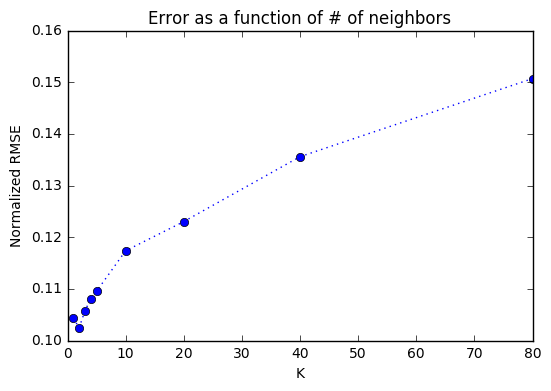

In [17]:
figure = plt.figure()
plt.plot(keys, means, 'bo:')
plt.xlabel('K')
plt.ylabel('Normalized RMSE')
plt.title('Error as a function of # of neighbors')

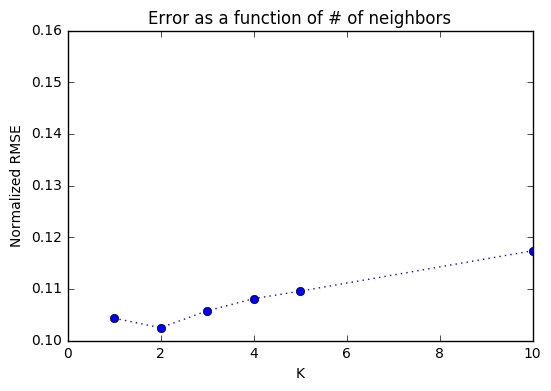

In [18]:
figure = plt.figure()
plt.plot(keys, means, 'bo:')
plt.xlabel('K')
plt.ylabel('Normalized RMSE')
plt.title('Error as a function of # of neighbors')
plt.xlim([0, 10]);